In [ ]:
%pip install azure-ai-vision-imageanalysis

## Helper Function

In [1]:
from matplotlib import pyplot as plt
import cv2

def show_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Convert the image from BGR to RGB for displaying with matplotlib,
    # because OpenCV uses BGR by default and matplotlib expects RGB.
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with matplotlib.
    plt.imshow(img_rgb)
    plt.axis("off")  # Turn off axis labels.
    plt.show()

## Load Azure Configuration

In [2]:
import os
azure_computer_vision_endpoint = os.environ["AZURE_COMPUTER_VISION_ENDPOINT"]
azure_computer_vision_key = os.environ["AZURE_COMPUTER_VISION_KEY"]

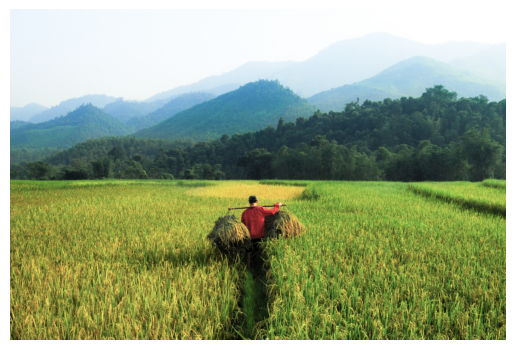

In [ ]:
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

# Create an Image Analysis client
client = ImageAnalysisClient(
    endpoint=azure_computer_vision_endpoint,
    credential=AzureKeyCredential(azure_computer_vision_key)
)

image = "../Data/images/1.jpg"
show_image(image)

# Read the image file as bytes
with open(image, "rb") as image_file:
    image_data = image_file.read()

## Caption

In [15]:
# Get a caption for the image. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.CAPTION],
    gender_neutral_caption=True,  # Optional (default is False)
)

print("Caption:")
if result.caption is not None:
    print(f"   '{result.caption.text}', Confidence {result.caption.confidence:.4f}")

Caption:
   'a person carrying hay in a field', Confidence 0.7150


## Dense Caption

In [16]:
# Get a caption for the image. This will be a synchronously (blocking) call.
result = client.analyze(
    image_data=image_data,
    visual_features=[VisualFeatures.DENSE_CAPTIONS],
    gender_neutral_caption=True,  # Optional (default is False)
)

print("Dense Captions:")
for item in result.dense_captions['values']:
    print(f"   '{item['text']}', Confidence {item['confidence']:.4f}")

Dense Captions:
   'a person carrying hay in a field', Confidence 0.7150
   'a person carrying hay in a field', Confidence 0.7820
   'a person in a red shirt', Confidence 0.8120
   'a person carrying hay in a field', Confidence 0.7480
   'a group of trees in the mountains', Confidence 0.6732
   'a person carrying hay bales', Confidence 0.7176
   'a person carrying hay in a field', Confidence 0.7127
   'a person carrying a bundle of grass', Confidence 0.7146
   'a forest of trees and mountains', Confidence 0.6565
   'a field of green grass', Confidence 0.6734
